In [1]:
import numpy as np 
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

## Phase 1

## load dataset

In [2]:
a=pd.read_csv('Updated.csv')
a

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14.000000,Male,3.990000,Smartphone,True,0.420000,"Poor Sleep, Eye Strain",Urban
1,11.000000,Female,4.610000,Laptop,True,0.300000,Poor Sleep,Urban
2,18.000000,Female,3.730000,TV,True,0.320000,Poor Sleep,Urban
3,15.000000,Female,1.210000,Laptop,NaN,0.390000,NaN,Urban
4,12.000000,Female,5.890000,Smartphone,True,0.490000,"Poor Sleep, Anxiety",Urban
...,...,...,...,...,...,...,...,...
14707,NaN,Male,0.000000,Laptop,True,0.519475,"Poor Sleep, Eye Strain, Anxiety",Urban
14708,12.095507,Female,5.855587,Smartphone,True,0.309472,"Poor Sleep, Obesity Risk",Urban
14709,9.499012,Male,5.309602,TV,True,0.629439,Poor Sleep,NaN
14710,17.415439,Male,5.477271,TV,True,0.327628,Poor Sleep,Urban


### Observation:
 - Dataset has been loaded successfully using pd.read_csv()

## Understanding the Structure of the Dataset

In [3]:
a.shape

(14712, 8)

## Observation:
 - The dataset contains 9712 rows and 8 columns representing various screen features.

### Previewing the first few rows

In [4]:
a.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14.0,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11.0,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18.0,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15.0,Female,1.21,Laptop,NaN,0.39,NaN,Urban
4,12.0,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


### Observation:
 - The preview shows the first few rows of the data and helps us check if the file loaded correctly.

## 📑 Column Descriptions

## Age

Represents the age of the child (8–18 years).

Helps analyze patterns of screen time across different age groups.



## Gender

Indicates whether the child is Male or Female.

Used to see if screen habits differ across genders.


## Avg_Daily_Screen_Time_hr

The average daily screen time in hours.

Continuous numeric variable ranging from 0 to 13.89 hrs.

Useful for understanding screen exposure levels.



## Primary_Device

The main device used for screen time (Smartphone, Laptop, TV, Tablet).

Shows technology preferences among kids.



## Exceeded_Recommended_Limit

Boolean (True/False) indicating if the child’s screen time exceeded the recommended limit.

Helps evaluate overuse of digital devices.



## Educational_to_Recreational_Ratio

Ratio between educational and recreational screen usage (0.3–0.6).

Higher values mean more educational use compared to entertainment.



## Health_Impacts

Records any health impacts linked to screen time (e.g., Poor Sleep, Eye Strain, Anxiety, Obesity Risk).

Categorical, sometimes with multiple impacts per child.

Most common value: “None” (~3,218 children).

No missing values (but “None” is treated as no health issues).

## Urban_or_Rural

Indicates whether the child lives in an Urban or Rural area.

Helps analyze how location influences screen time and device usage.



### Dataset Structure and Data Types

In [5]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                13241 non-null  float64
 1   Gender                             13241 non-null  object 
 2   Avg_Daily_Screen_Time_hr           13241 non-null  float64
 3   Primary_Device                     13241 non-null  object 
 4   Exceeded_Recommended_Limit         13241 non-null  object 
 5   Educational_to_Recreational_Ratio  13241 non-null  float64
 6   Health_Impacts                     8896 non-null   object 
 7   Urban_or_Rural                     13241 non-null  object 
dtypes: float64(3), object(5)
memory usage: 919.6+ KB


### Observation:
 - The dataset contains 14712 records and 8 columns.
 - Out of the 8 columns:
    - 5 are categorical (object type), such as Gender,Primary_Device,Health_Impacts and Urban_or_Rural.
    - 3 are numerical (float64), such as Avg_Daily_Screen_Time_hr and Educational_to_Recreational_Ratio .
 - Several columns have missing values.
 - The dataset occupies approximately 920 KB of memory.

In [6]:
a.isnull().sum()

Age                                  1471
Gender                               1471
Avg_Daily_Screen_Time_hr             1471
Primary_Device                       1471
Exceeded_Recommended_Limit           1471
Educational_to_Recreational_Ratio    1471
Health_Impacts                       5816
Urban_or_Rural                       1471
dtype: int64

In [7]:
round(a.isnull().sum()/len(a)*100,2)

Age                                  10.00
Gender                               10.00
Avg_Daily_Screen_Time_hr             10.00
Primary_Device                       10.00
Exceeded_Recommended_Limit           10.00
Educational_to_Recreational_Ratio    10.00
Health_Impacts                       39.53
Urban_or_Rural                       10.00
dtype: float64

In [8]:
a.duplicated().sum()

np.int64(28)

### Statistical Overview of Numerical Data

In [9]:
a.describe()

,Age,Avg_Daily_Screen_Time_hr,Educational_to_Recreational_Ratio
count,13241.000000,13241.000000,13241.000000
mean,12.964215,4.354083,0.428003
std,3.196445,1.723859,0.074764
min,7.200862,0.000000,0.272556
25%,10.000000,3.420000,0.370000
50%,13.000000,4.429708,0.429920
75%,16.000000,5.390000,0.480000
max,19.792989,14.223452,0.659481


In [10]:
a['Age'].value_counts()

Age
17.000000    834
8.000000     825
13.000000    819
14.000000    808
9.000000     793
            ... 
16.436998      1
12.095507      1
9.499012       1
17.415439      1
8.277780       1
Name: count, Length: 4528, dtype: int64

In [11]:
a['Gender'].value_counts()

Gender
Male      6712
Female    6529
Name: count, dtype: int64

In [12]:
a['Avg_Daily_Screen_Time_hr'].value_counts().nlargest()

Avg_Daily_Screen_Time_hr
0.00    312
4.93     38
4.96     36
4.03     35
4.05     34
Name: count, dtype: int64

In [13]:
a['Primary_Device'].value_counts()

Primary_Device
Smartphone    6196
TV            3465
Laptop        1912
Tablet        1668
Name: count, dtype: int64

In [14]:
a['Exceeded_Recommended_Limit'].value_counts()

Exceeded_Recommended_Limit
True     11320
False     1921
Name: count, dtype: int64

In [15]:
a['Educational_to_Recreational_Ratio'].value_counts().nlargest()

Educational_to_Recreational_Ratio
0.45    471
0.46    447
0.44    437
0.47    434
0.41    432
Name: count, dtype: int64

In [16]:
a['Educational_to_Recreational_Ratio'].value_counts().nsmallest()

Educational_to_Recreational_Ratio
0.484890    1
0.472731    1
0.380421    1
0.524415    1
0.538741    1
Name: count, dtype: int64

In [17]:
# Extract unique values from Health_Impacts column
unique_health_impacts = set(
    val.strip()
    for entry in a["Health_Impacts"].dropna()
    if entry and entry != "None"
    for val in entry.split(",")
)

print('unique is:',unique_health_impacts)

unique is: {'Anxiety', 'Poor Sleep', 'Eye Strain', 'Obesity Risk'}


In [18]:
a['Health_Impacts'].value_counts()

Health_Impacts
Poor Sleep                                       3149
Poor Sleep, Eye Strain                           1371
Eye Strain                                        856
Poor Sleep, Anxiety                               810
Poor Sleep, Obesity Risk                          642
Anxiety                                           537
Obesity Risk                                      339
Poor Sleep, Eye Strain, Anxiety                   338
Poor Sleep, Eye Strain, Obesity Risk              245
Eye Strain, Anxiety                               174
Eye Strain, Obesity Risk                          137
Poor Sleep, Anxiety, Obesity Risk                 112
Anxiety, Obesity Risk                              91
Poor Sleep, Eye Strain, Anxiety, Obesity Risk      50
Eye Strain, Anxiety, Obesity Risk                  45
Name: count, dtype: int64

In [19]:
a['Urban_or_Rural'].value_counts()

Urban_or_Rural
Urban    9387
Rural    3854
Name: count, dtype: int64

## Phase 2

### Null Value Count Across All Columns

In [20]:
# check Missing values and duplicates
print("Missing values per column:\n", a.isnull().sum())

Missing values per column:
 Age                                  1471
Gender                               1471
Avg_Daily_Screen_Time_hr             1471
Primary_Device                       1471
Exceeded_Recommended_Limit           1471
Educational_to_Recreational_Ratio    1471
Health_Impacts                       5816
Urban_or_Rural                       1471
dtype: int64


### Percentage of Missing Values

In [21]:
round(a.isnull().sum()/len(a)*100,2)

Age                                  10.00
Gender                               10.00
Avg_Daily_Screen_Time_hr             10.00
Primary_Device                       10.00
Exceeded_Recommended_Limit           10.00
Educational_to_Recreational_Ratio    10.00
Health_Impacts                       39.53
Urban_or_Rural                       10.00
dtype: float64

## Observations
> The Dataset Exhibits missing values in only one column

> Health_Impacts having missing values around 33% of total record.

## check duplicates

In [22]:
d=a.duplicated().sum()
print("Number of duplicated rows in se is:",d)

Number of duplicated rows in se is: 28


## Data Cleaning

## removing duplicate(repeated) rows 

In [23]:
if d>0:
    a=a.drop_duplicates()
    print(f"duplicates are removed,New shape is:",a.shape)
else:
    print("No duplicated")

duplicates are removed,New shape is: (14684, 8)


In [24]:
a["Age"].isnull().sum()

np.int64(1469)

In [25]:
b=a['Age'].median()
b

13.0

In [26]:
a['Age'].mean()

np.float64(12.966490224640069)

In [27]:
a['Age'].fillna(b,inplace=True)

In [28]:
a['Age'].isnull().sum()

np.int64(0)

In [29]:
a['Age'].median()

13.0

In [30]:
a['Gender'].isnull().sum()

np.int64(1470)

In [31]:
a.dropna(subset='Gender',inplace=True)

In [32]:
a['Gender'].isnull().sum()

np.int64(0)

In [33]:
a.shape

(13214, 8)

In [34]:
a.isnull().sum()

Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr             1322
Primary_Device                       1322
Exceeded_Recommended_Limit           1333
Educational_to_Recreational_Ratio    1335
Health_Impacts                       5221
Urban_or_Rural                       1323
dtype: int64

In [35]:
c=a['Avg_Daily_Screen_Time_hr'].mean()
c

np.float64(4.353049347963229)

In [36]:
a['Avg_Daily_Screen_Time_hr'].median()

4.42

In [37]:
a['Avg_Daily_Screen_Time_hr'].fillna(c,inplace=True)

In [38]:
a['Avg_Daily_Screen_Time_hr'].isnull().sum()

np.int64(0)

In [39]:
a['Primary_Device'].value_counts()

Primary_Device
Smartphone    5540
TV            3121
Laptop        1727
Tablet        1504
Name: count, dtype: int64

In [40]:
a['Primary_Device'].isnull().sum()

np.int64(1322)

In [41]:
a['Primary_Device'].fillna('Smartphone',inplace=True)

In [42]:
a['Primary_Device'].isnull().sum()

np.int64(0)

In [43]:
a.isnull().sum()

Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit           1333
Educational_to_Recreational_Ratio    1335
Health_Impacts                       5221
Urban_or_Rural                       1323
dtype: int64

In [44]:
a['Exceeded_Recommended_Limit'].dtype

dtype('O')

In [45]:
a

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14.000000,Male,3.990000,Smartphone,True,0.420000,"Poor Sleep, Eye Strain",Urban
1,11.000000,Female,4.610000,Laptop,True,0.300000,Poor Sleep,Urban
2,18.000000,Female,3.730000,TV,True,0.320000,Poor Sleep,Urban
3,15.000000,Female,1.210000,Laptop,NaN,0.390000,NaN,Urban
4,12.000000,Female,5.890000,Smartphone,True,0.490000,"Poor Sleep, Anxiety",Urban
...,...,...,...,...,...,...,...,...
14707,13.000000,Male,0.000000,Laptop,True,0.519475,"Poor Sleep, Eye Strain, Anxiety",Urban
14708,12.095507,Female,5.855587,Smartphone,True,0.309472,"Poor Sleep, Obesity Risk",Urban
14709,9.499012,Male,5.309602,TV,True,0.629439,Poor Sleep,NaN
14710,17.415439,Male,5.477271,TV,True,0.327628,Poor Sleep,Urban


In [46]:
a['Exceeded_Recommended_Limit'].value_counts()

Exceeded_Recommended_Limit
True     10175
False     1706
Name: count, dtype: int64

In [47]:
a['Exceeded_Recommended_Limit'].fillna(True,inplace=True)

In [48]:
a['Exceeded_Recommended_Limit'].value_counts()

Exceeded_Recommended_Limit
True     11508
False     1706
Name: count, dtype: int64

In [49]:
a.isnull().sum()

Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio    1335
Health_Impacts                       5221
Urban_or_Rural                       1323
dtype: int64

In [50]:
a.dropna(subset='Educational_to_Recreational_Ratio',inplace=True)

In [51]:
a.isnull().sum()

Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       4705
Urban_or_Rural                       1199
dtype: int64

In [52]:
a.shape

(11879, 8)

In [53]:
a['Health_Impacts'].fillna("No Impact",inplace=True)

In [54]:
a['Health_Impacts'].value_counts()

Health_Impacts
No Impact                                        4705
Poor Sleep                                       2553
Poor Sleep, Eye Strain                           1110
Eye Strain                                        702
Poor Sleep, Anxiety                               646
Poor Sleep, Obesity Risk                          516
Anxiety                                           434
Obesity Risk                                      268
Poor Sleep, Eye Strain, Anxiety                   266
Poor Sleep, Eye Strain, Obesity Risk              195
Eye Strain, Anxiety                               136
Eye Strain, Obesity Risk                          109
Poor Sleep, Anxiety, Obesity Risk                  92
Anxiety, Obesity Risk                              76
Eye Strain, Anxiety, Obesity Risk                  37
Poor Sleep, Eye Strain, Anxiety, Obesity Risk      34
Name: count, dtype: int64

In [55]:
a['Urban_or_Rural'].value_counts()

Urban_or_Rural
Urban    7604
Rural    3076
Name: count, dtype: int64

In [56]:
a['Urban_or_Rural'].fillna('Urban',inplace=True)

In [57]:
a.isnull().sum()

Age                                  0
Gender                               0
Avg_Daily_Screen_Time_hr             0
Primary_Device                       0
Exceeded_Recommended_Limit           0
Educational_to_Recreational_Ratio    0
Health_Impacts                       0
Urban_or_Rural                       0
dtype: int64

In [58]:
a.shape

(11879, 8)

In [59]:
a

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14.000000,Male,3.990000,Smartphone,True,0.420000,"Poor Sleep, Eye Strain",Urban
1,11.000000,Female,4.610000,Laptop,True,0.300000,Poor Sleep,Urban
2,18.000000,Female,3.730000,TV,True,0.320000,Poor Sleep,Urban
3,15.000000,Female,1.210000,Laptop,True,0.390000,No Impact,Urban
4,12.000000,Female,5.890000,Smartphone,True,0.490000,"Poor Sleep, Anxiety",Urban
...,...,...,...,...,...,...,...,...
14707,13.000000,Male,0.000000,Laptop,True,0.519475,"Poor Sleep, Eye Strain, Anxiety",Urban
14708,12.095507,Female,5.855587,Smartphone,True,0.309472,"Poor Sleep, Obesity Risk",Urban
14709,9.499012,Male,5.309602,TV,True,0.629439,Poor Sleep,Urban
14710,17.415439,Male,5.477271,TV,True,0.327628,Poor Sleep,Urban


In [60]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11879 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11879 non-null  float64
 1   Gender                             11879 non-null  object 
 2   Avg_Daily_Screen_Time_hr           11879 non-null  float64
 3   Primary_Device                     11879 non-null  object 
 4   Exceeded_Recommended_Limit         11879 non-null  bool   
 5   Educational_to_Recreational_Ratio  11879 non-null  float64
 6   Health_Impacts                     11879 non-null  object 
 7   Urban_or_Rural                     11879 non-null  object 
dtypes: bool(1), float64(3), object(4)
memory usage: 754.0+ KB


In [61]:
a["Age"]=a['Age'].astype(int)

In [62]:
a['Educational_to_Recreational_Ratio']=a['Educational_to_Recreational_Ratio'].round(2)

In [63]:
a['Avg_Daily_Screen_Time_hr']=a['Avg_Daily_Screen_Time_hr'].round(2)

In [64]:
a

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,True,0.39,No Impact,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban
...,...,...,...,...,...,...,...,...
14707,13,Male,0.00,Laptop,True,0.52,"Poor Sleep, Eye Strain, Anxiety",Urban
14708,12,Female,5.86,Smartphone,True,0.31,"Poor Sleep, Obesity Risk",Urban
14709,9,Male,5.31,TV,True,0.63,Poor Sleep,Urban
14710,17,Male,5.48,TV,True,0.33,Poor Sleep,Urban


In [65]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11879 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11879 non-null  int64  
 1   Gender                             11879 non-null  object 
 2   Avg_Daily_Screen_Time_hr           11879 non-null  float64
 3   Primary_Device                     11879 non-null  object 
 4   Exceeded_Recommended_Limit         11879 non-null  bool   
 5   Educational_to_Recreational_Ratio  11879 non-null  float64
 6   Health_Impacts                     11879 non-null  object 
 7   Urban_or_Rural                     11879 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 754.0+ KB


In [66]:
a.isnull().sum()

Age                                  0
Gender                               0
Avg_Daily_Screen_Time_hr             0
Primary_Device                       0
Exceeded_Recommended_Limit           0
Educational_to_Recreational_Ratio    0
Health_Impacts                       0
Urban_or_Rural                       0
dtype: int64

##  Non-Visual Bivariate Analysis


In [67]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11879 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11879 non-null  int64  
 1   Gender                             11879 non-null  object 
 2   Avg_Daily_Screen_Time_hr           11879 non-null  float64
 3   Primary_Device                     11879 non-null  object 
 4   Exceeded_Recommended_Limit         11879 non-null  bool   
 5   Educational_to_Recreational_Ratio  11879 non-null  float64
 6   Health_Impacts                     11879 non-null  object 
 7   Urban_or_Rural                     11879 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 754.0+ KB


In [68]:
a.groupby(['Gender','Urban_or_Rural'])['Urban_or_Rural'].count()
#cat vs cat


Gender  Urban_or_Rural
Female  Rural             1495
        Urban             4363
Male    Rural             1581
        Urban             4440
Name: Urban_or_Rural, dtype: int64

In [69]:
a.groupby(['Age','Gender'])['Age'].count()
#num vs cat

Age  Gender
7    Female      91
     Male        92
8    Female     493
     Male       545
9    Female     482
     Male       507
10   Female     450
     Male       484
11   Female     478
     Male       469
12   Female     503
     Male       483
13   Female    1124
     Male      1073
14   Female     449
     Male       516
15   Female     497
     Male       435
16   Female     442
     Male       502
17   Female     439
     Male       485
18   Female     374
     Male       396
19   Female      36
     Male        34
Name: Age, dtype: int64

In [70]:
a.groupby(['Avg_Daily_Screen_Time_hr','Age'])['Age'].count()
#num vs num

Avg_Daily_Screen_Time_hr  Age
0.00                      7      15
                          8      65
                          9      74
                          10     69
                          13     25
                                 ..
12.08                     10      1
12.09                     10      1
12.40                     10      1
12.80                     9       1
14.22                     9       1
Name: Age, Length: 5083, dtype: int64

In [71]:
a

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,True,0.39,No Impact,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban
...,...,...,...,...,...,...,...,...
14707,13,Male,0.00,Laptop,True,0.52,"Poor Sleep, Eye Strain, Anxiety",Urban
14708,12,Female,5.86,Smartphone,True,0.31,"Poor Sleep, Obesity Risk",Urban
14709,9,Male,5.31,TV,True,0.63,Poor Sleep,Urban
14710,17,Male,5.48,TV,True,0.33,Poor Sleep,Urban


## Phase 2 visualization

## univariate


In [72]:
a

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,True,0.39,No Impact,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban
...,...,...,...,...,...,...,...,...
14707,13,Male,0.00,Laptop,True,0.52,"Poor Sleep, Eye Strain, Anxiety",Urban
14708,12,Female,5.86,Smartphone,True,0.31,"Poor Sleep, Obesity Risk",Urban
14709,9,Male,5.31,TV,True,0.63,Poor Sleep,Urban
14710,17,Male,5.48,TV,True,0.33,Poor Sleep,Urban


In [73]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11879 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11879 non-null  int64  
 1   Gender                             11879 non-null  object 
 2   Avg_Daily_Screen_Time_hr           11879 non-null  float64
 3   Primary_Device                     11879 non-null  object 
 4   Exceeded_Recommended_Limit         11879 non-null  bool   
 5   Educational_to_Recreational_Ratio  11879 non-null  float64
 6   Health_Impacts                     11879 non-null  object 
 7   Urban_or_Rural                     11879 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 754.0+ KB


In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

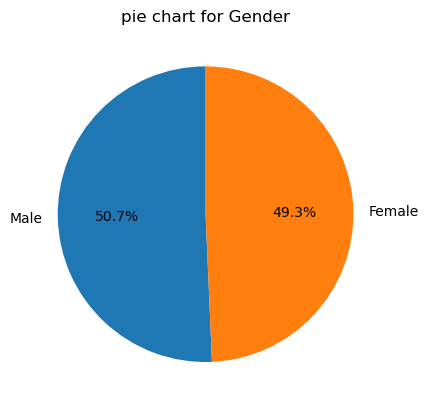

In [75]:
import matplotlib.pyplot as plt

plt.pie(
    a['Gender'].value_counts().values,        # values (counts)
    labels=a['Gender'].value_counts().index,  # labels (Male/Female/etc.)
    autopct='%1.1f%%',                        # show percentages
    startangle=90                             # rotate start angle
)

plt.title('pie chart for Gender')
plt.show()

Text(0.5, 1.0, 'Gender sum')

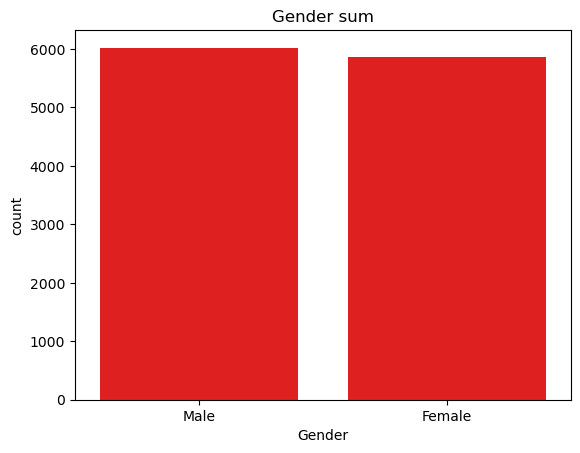

In [76]:
sns.countplot(a,x='Gender',color='red')
plt.title('Gender sum')


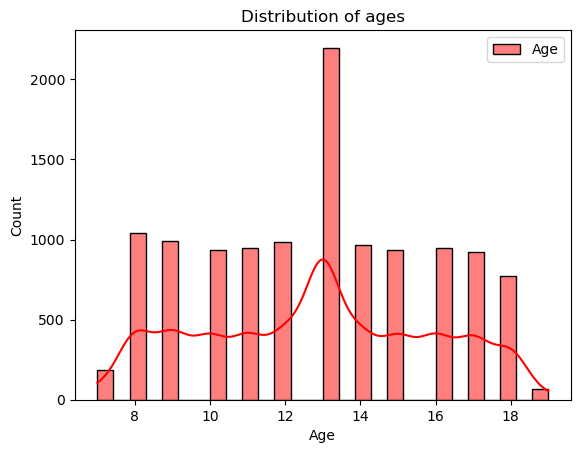

In [77]:
sns.histplot(a,x='Age',kde=True,label='Age',color='red')
plt.title('Distribution of ages')
plt.legend()

Text(0.5, 1.0, 'count for area')

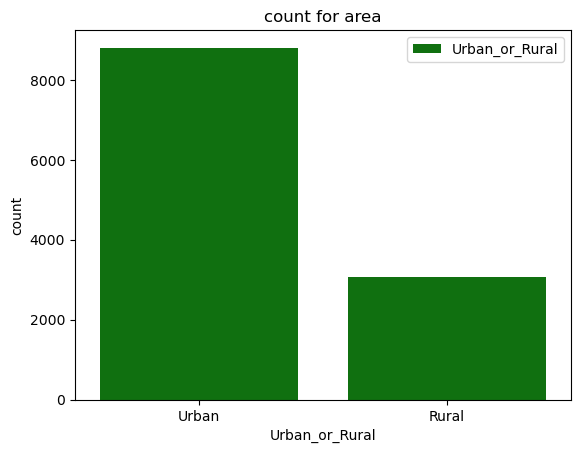

In [78]:
sns.countplot(a,x='Urban_or_Rural',label="Urban_or_Rural",color='green')
plt.title('count for area')

<Axes: xlabel='Avg_Daily_Screen_Time_hr'>

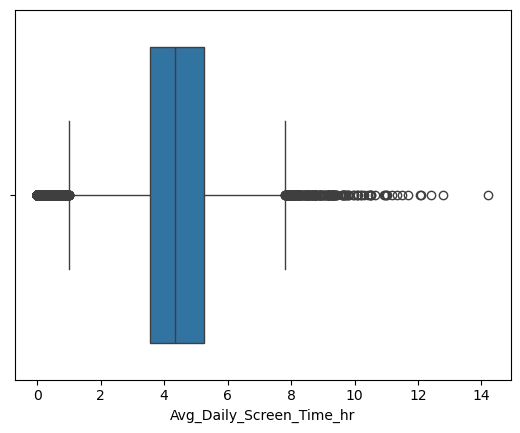

In [79]:
sns.boxplot(data=a,x='Avg_Daily_Screen_Time_hr')

([<matplotlib.patches.Wedge at 0x15e1ea9f250>,
 [Text(-1.0981973907817315, -0.06294831912129924, 'Smartphone'),
  Text(0.9854566755100949, -0.8478650486325001, 'TV'),
  Text(0.9930135415322232, 0.47320619853678153, 'Laptop'),
  Text(0.4559500495786852, 1.217419217972673, 'Tablet')],
 [Text(-0.5990167586082171, -0.03433544679343595, '51.82%'),
  Text(0.6064348772369814, -0.5217631068507693, '23.74%'),
  Text(0.5416437499266671, 0.25811247192915354, '13.03%'),
  Text(0.28058464589457544, 0.7491810572139527, '11.41%')])

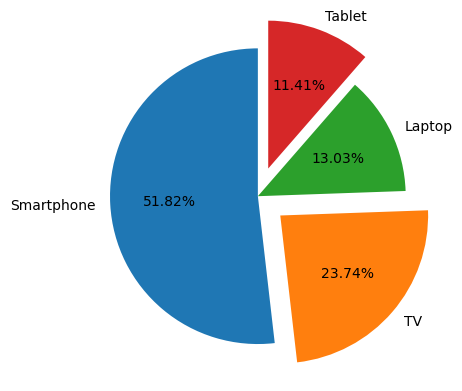

In [80]:
plt.pie(x=a['Primary_Device'].value_counts().values,labels=a['Primary_Device'].value_counts().index,autopct='%1.2f%%',startangle=90,explode=[0,0.2,0,0.2])

In [81]:
a

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,True,0.39,No Impact,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban
...,...,...,...,...,...,...,...,...
14707,13,Male,0.00,Laptop,True,0.52,"Poor Sleep, Eye Strain, Anxiety",Urban
14708,12,Female,5.86,Smartphone,True,0.31,"Poor Sleep, Obesity Risk",Urban
14709,9,Male,5.31,TV,True,0.63,Poor Sleep,Urban
14710,17,Male,5.48,TV,True,0.33,Poor Sleep,Urban


<Axes: xlabel='Avg_Daily_Screen_Time_hr', ylabel='Count'>

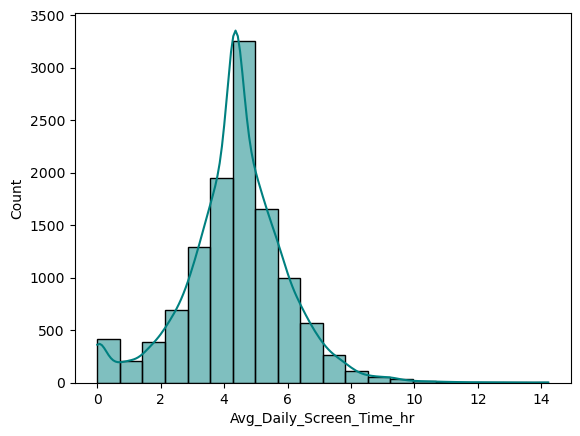

In [82]:
sns.histplot(data=a,x='Avg_Daily_Screen_Time_hr',kde=True,color='teal',bins=20)

<Axes: xlabel='Exceeded_Recommended_Limit', ylabel='count'>

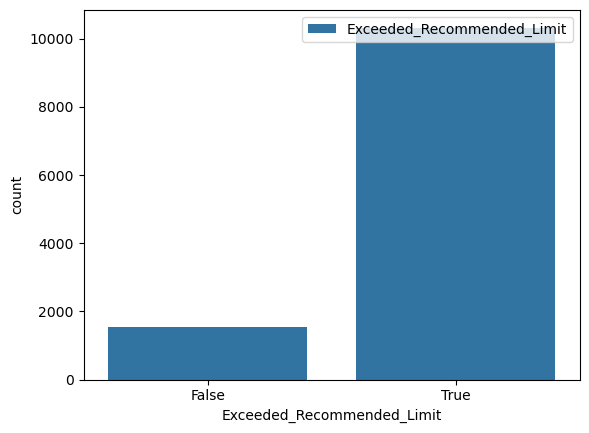

In [83]:
sns.countplot(a,x='Exceeded_Recommended_Limit',label='Exceeded_Recommended_Limit')

In [84]:
a

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,True,0.39,No Impact,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban
...,...,...,...,...,...,...,...,...
14707,13,Male,0.00,Laptop,True,0.52,"Poor Sleep, Eye Strain, Anxiety",Urban
14708,12,Female,5.86,Smartphone,True,0.31,"Poor Sleep, Obesity Risk",Urban
14709,9,Male,5.31,TV,True,0.63,Poor Sleep,Urban
14710,17,Male,5.48,TV,True,0.33,Poor Sleep,Urban


## Bivariante

<Axes: xlabel='Age', ylabel='Avg_Daily_Screen_Time_hr'>

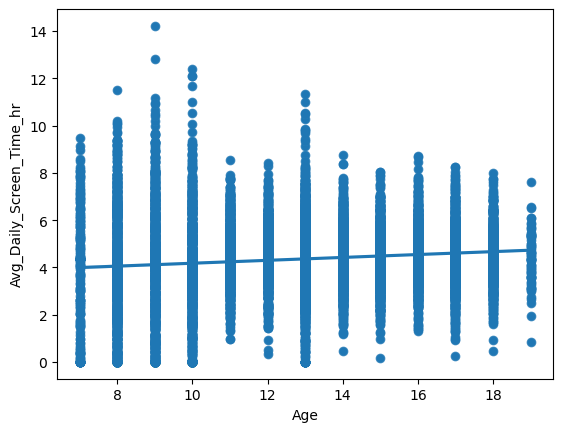

In [85]:
sns.scatterplot(a,x='Age',y='Avg_Daily_Screen_Time_hr',palette='plasma')
sns.regplot(a,x='Age',y='Avg_Daily_Screen_Time_hr')

#num vs num

<Axes: xlabel='Age', ylabel='Educational_to_Recreational_Ratio'>

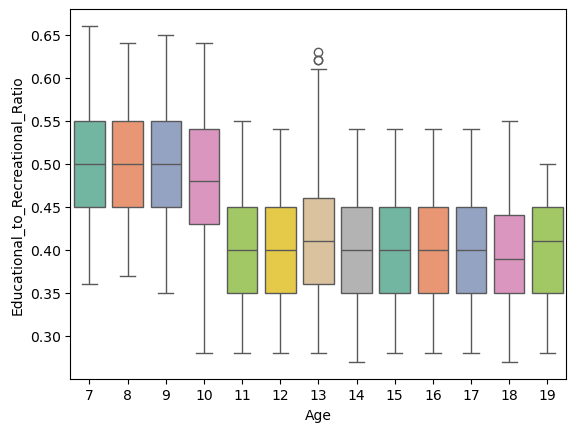

In [86]:
#num vs num
sns.boxplot(a,x='Age',y='Educational_to_Recreational_Ratio',palette='Set2')

<Axes: xlabel='Primary_Device', ylabel='Avg_Daily_Screen_Time_hr'>

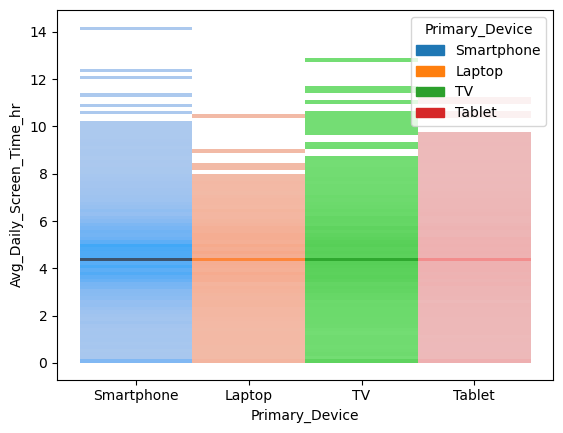

In [87]:
#num vs cat
sns.histplot(a,x='Primary_Device',y='Avg_Daily_Screen_Time_hr',hue='Primary_Device',multiple='dodge')

Urban_or_Rural
Rural    3076
Urban    8803
Name: Urban_or_Rural, dtype: int64


<Axes: xlabel='Urban_or_Rural', ylabel='Avg_Daily_Screen_Time_hr'>

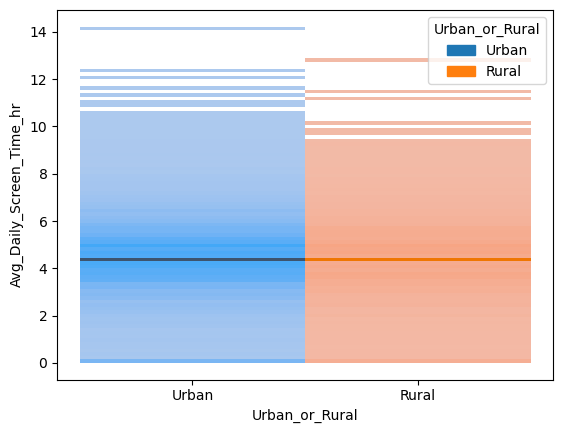

In [88]:
#num vs cat
print(a.groupby(['Urban_or_Rural'])['Urban_or_Rural'].count())
sns.histplot(a,x='Urban_or_Rural',y='Avg_Daily_Screen_Time_hr',hue='Urban_or_Rural')

Text(0, 0.5, 'Avg daily screen time per hr')

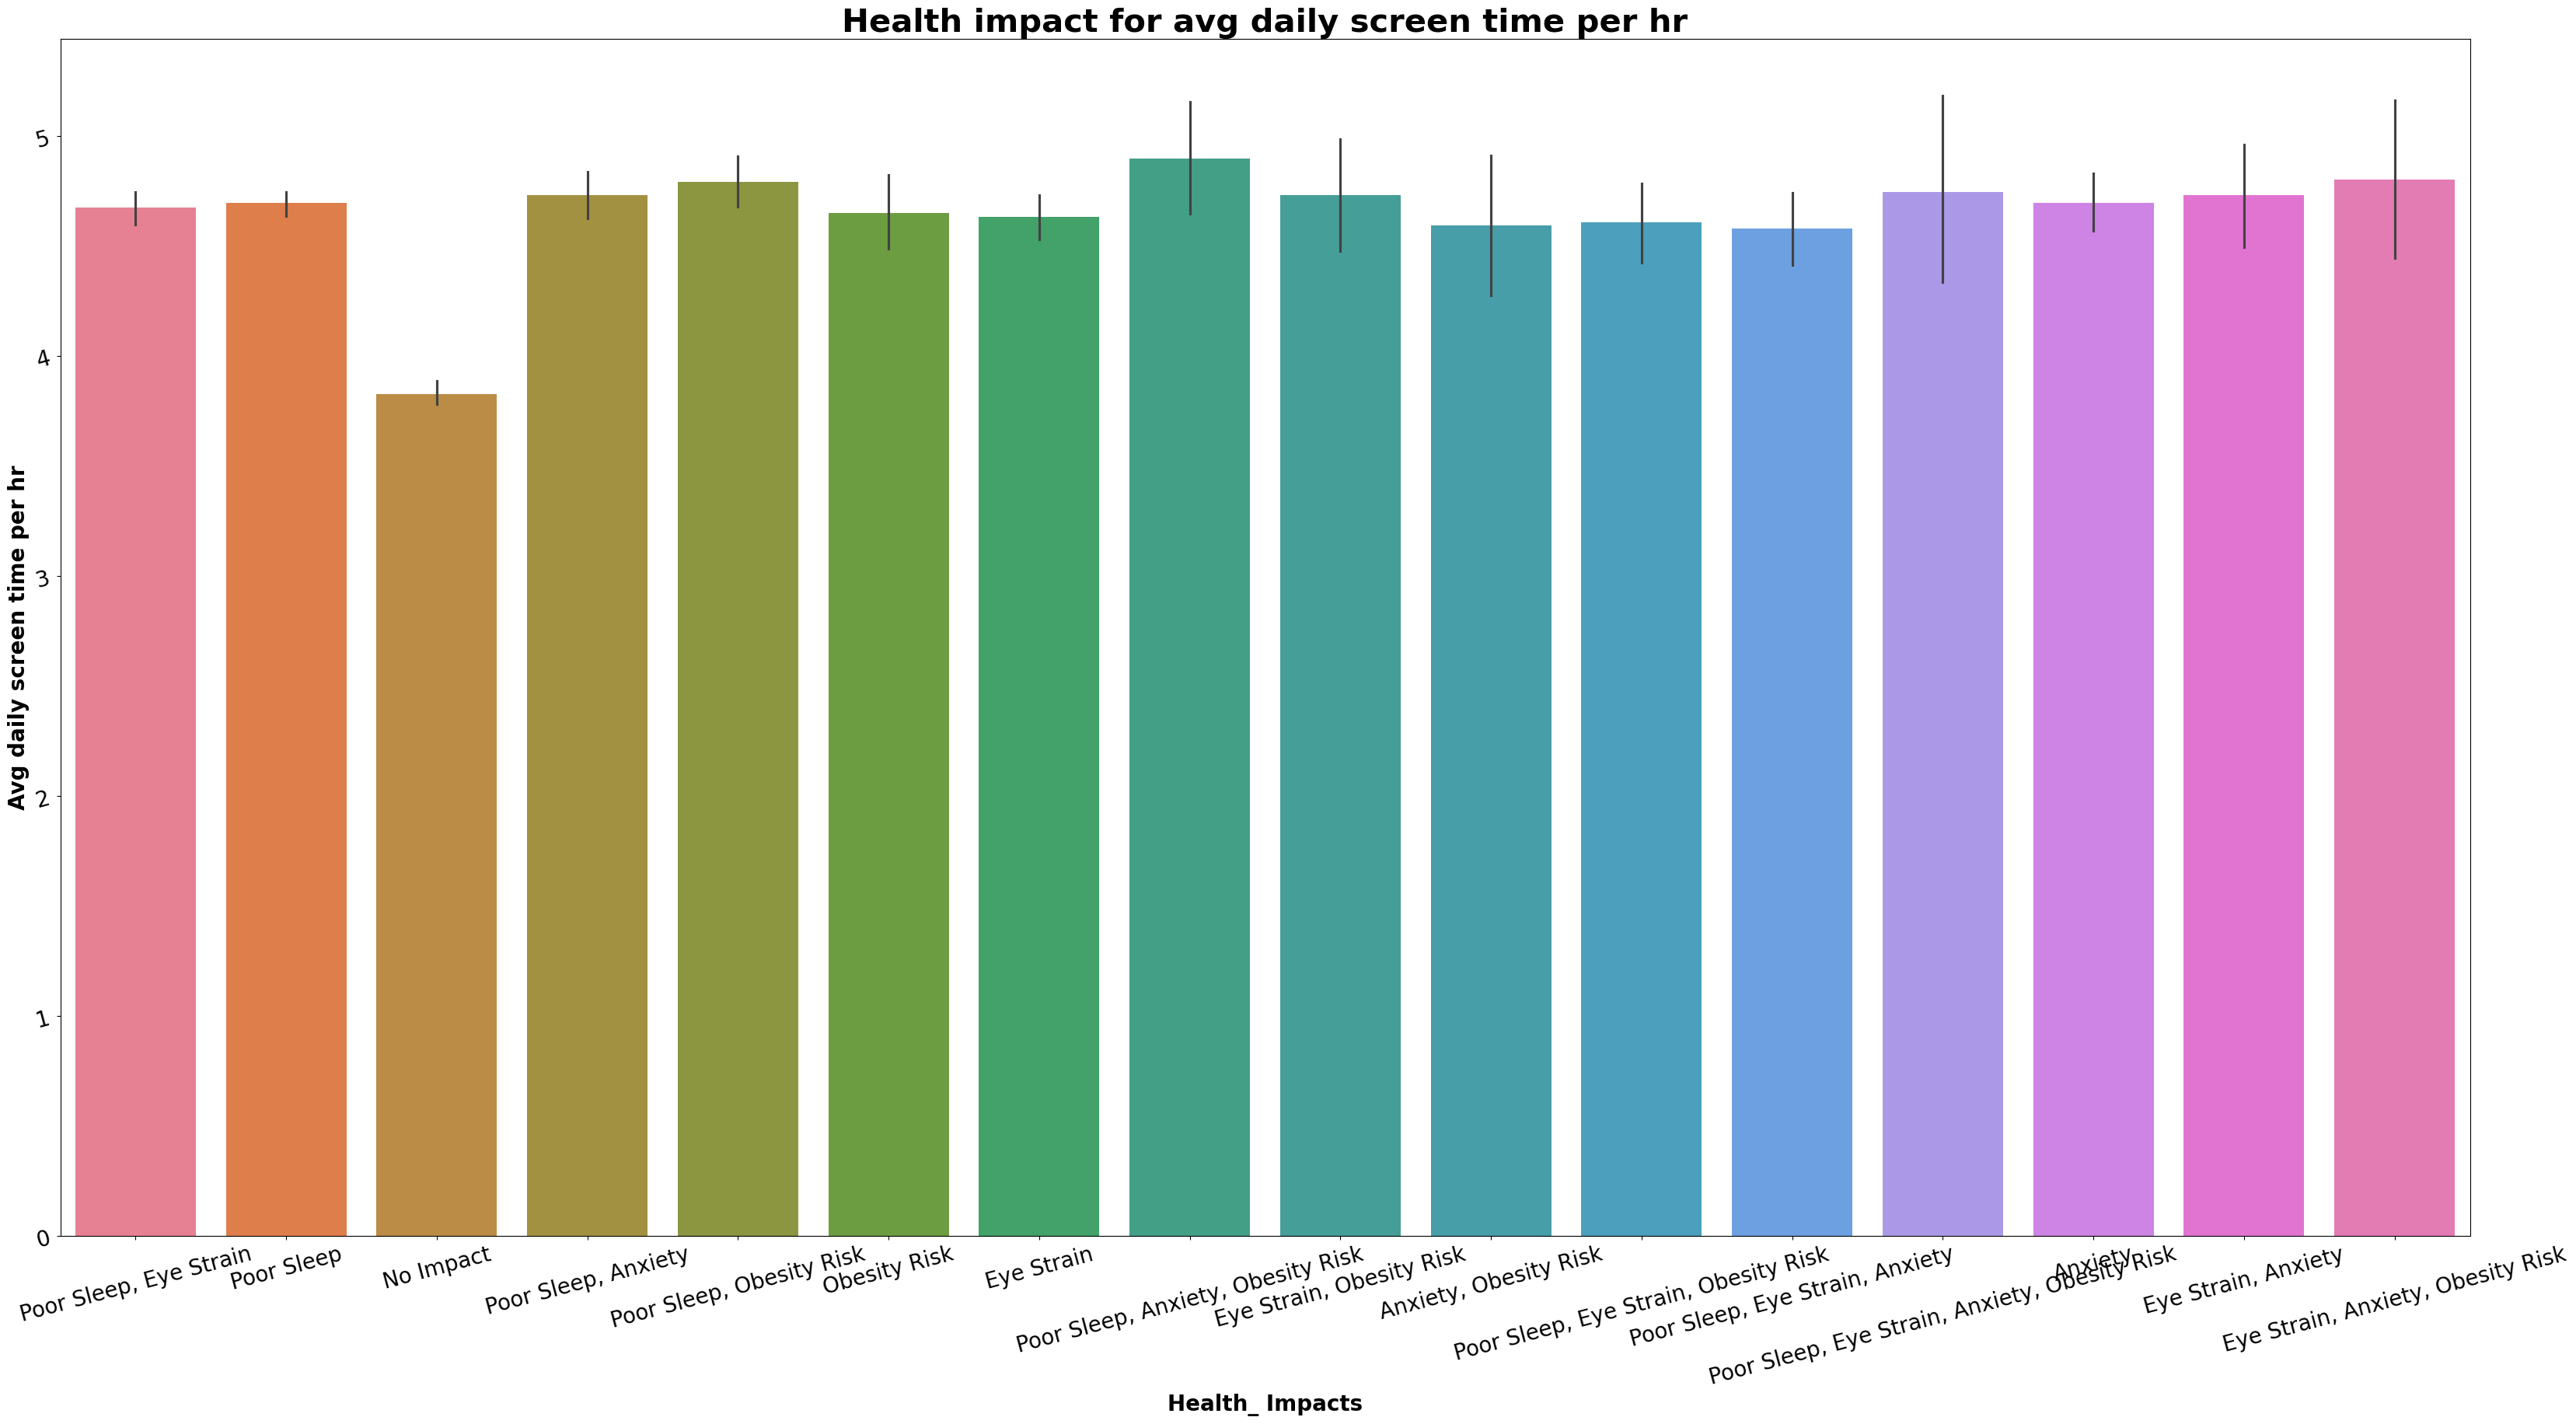

In [89]:
#cat vs num
plt.figure(figsize=(40,20))
sns.barplot(a,x='Health_Impacts',y='Avg_Daily_Screen_Time_hr',hue='Health_Impacts')
plt.title("Health impact for avg daily screen time per hr",fontsize=30,fontweight='bold')
plt.xticks(fontsize=20, rotation=15)
plt.yticks(fontsize=20, rotation=15)
plt.xlabel("Health_ Impacts", fontsize=20, fontweight="bold")
plt.ylabel("Avg daily screen time per hr", fontsize=20, fontweight="bold")

In [90]:
a[['Age','Avg_Daily_Screen_Time_hr','Educational_to_Recreational_Ratio']].corr()

,Age,Avg_Daily_Screen_Time_hr,Educational_to_Recreational_Ratio
Age,1.000000,0.115142,-0.455378
Avg_Daily_Screen_Time_hr,0.115142,1.000000,-0.090975
Educational_to_Recreational_Ratio,-0.455378,-0.090975,1.000000


<Axes: >

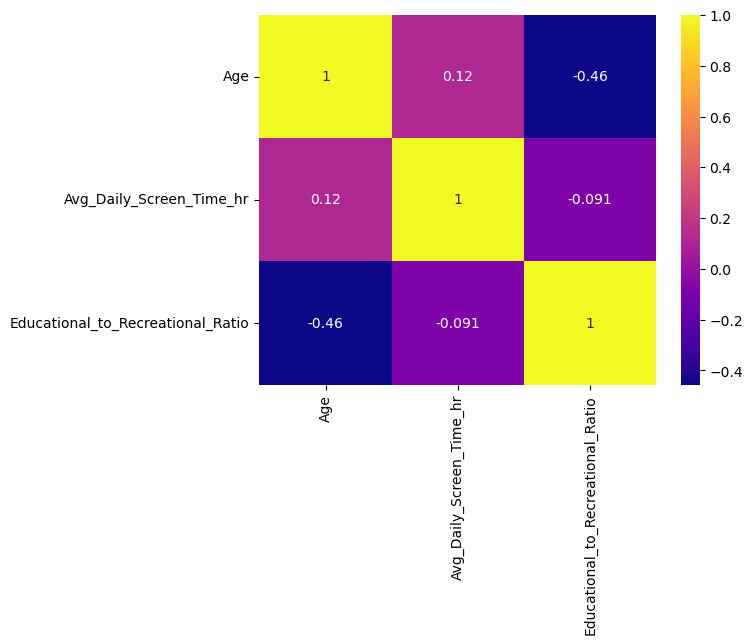

In [91]:
sns.heatmap(a[['Age','Avg_Daily_Screen_Time_hr','Educational_to_Recreational_Ratio']].corr(),annot=True,cmap='plasma')

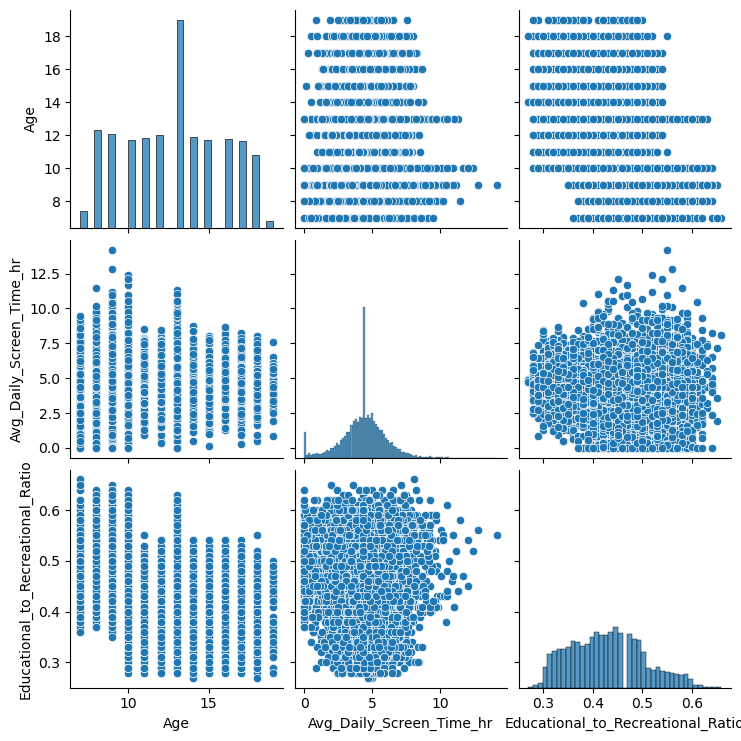

In [92]:
sns.pairplot(a[['Age','Avg_Daily_Screen_Time_hr','Educational_to_Recreational_Ratio']])

In [93]:
a

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,True,0.39,No Impact,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban
...,...,...,...,...,...,...,...,...
14707,13,Male,0.00,Laptop,True,0.52,"Poor Sleep, Eye Strain, Anxiety",Urban
14708,12,Female,5.86,Smartphone,True,0.31,"Poor Sleep, Obesity Risk",Urban
14709,9,Male,5.31,TV,True,0.63,Poor Sleep,Urban
14710,17,Male,5.48,TV,True,0.33,Poor Sleep,Urban


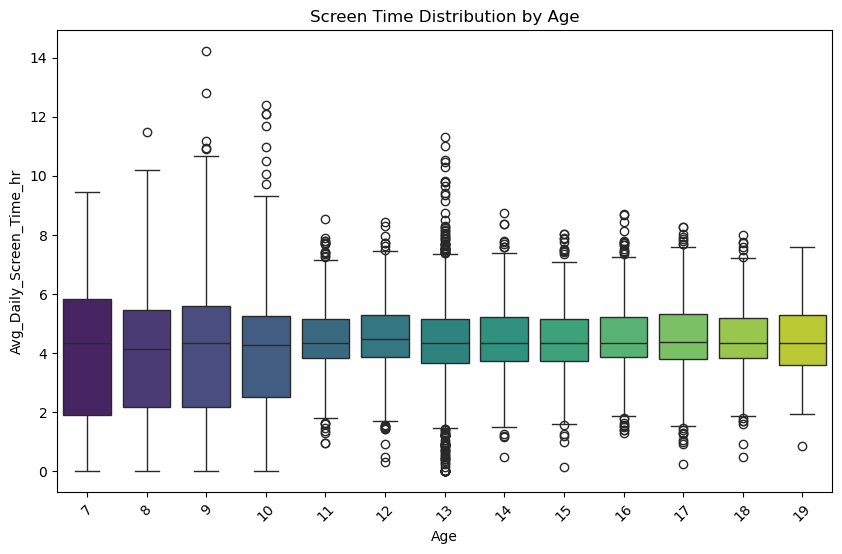

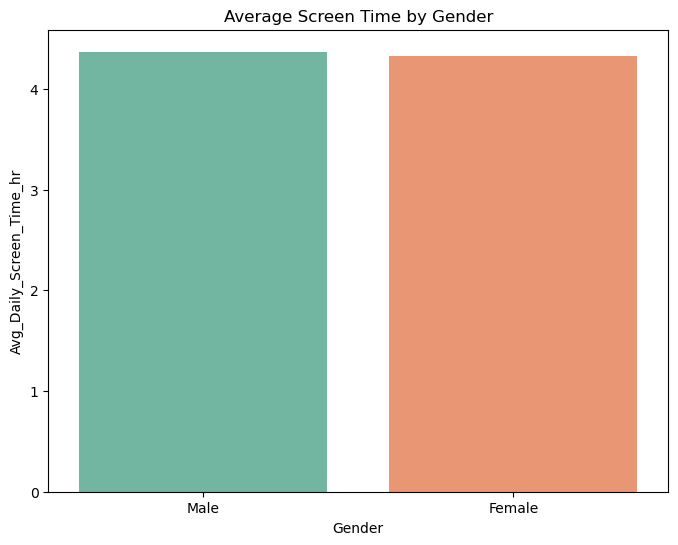

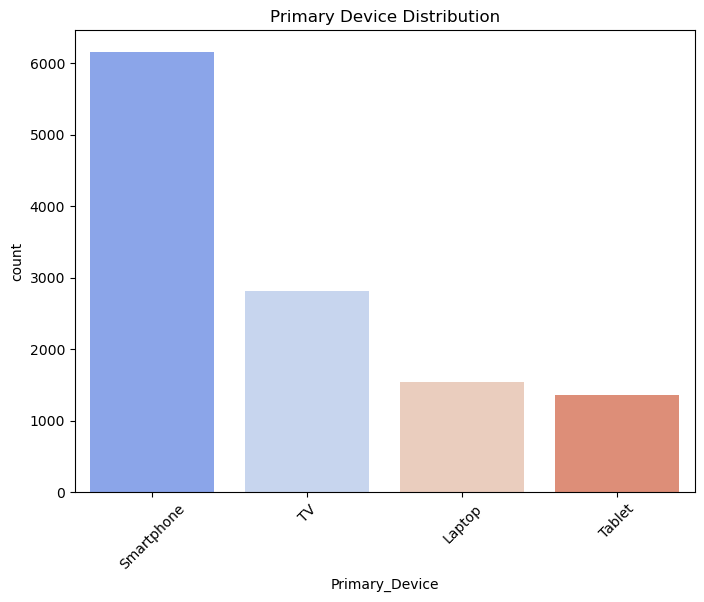

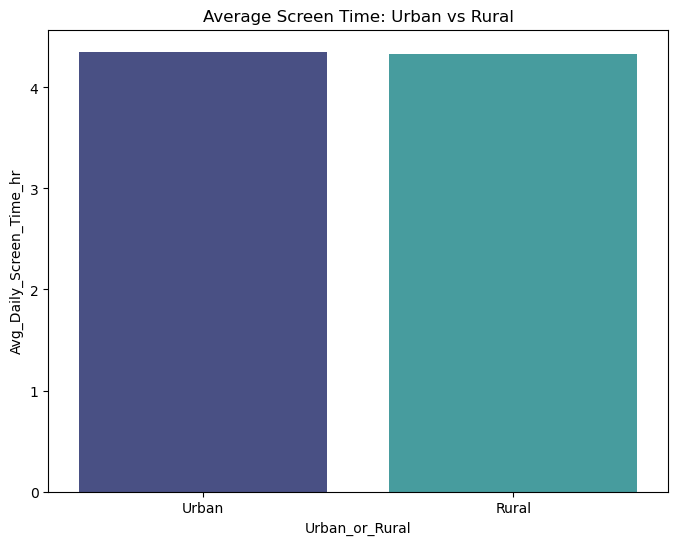

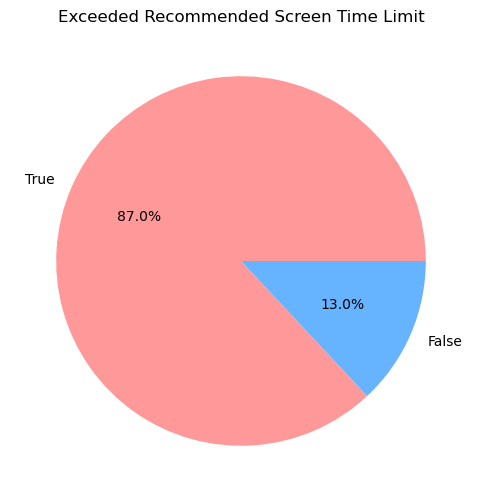

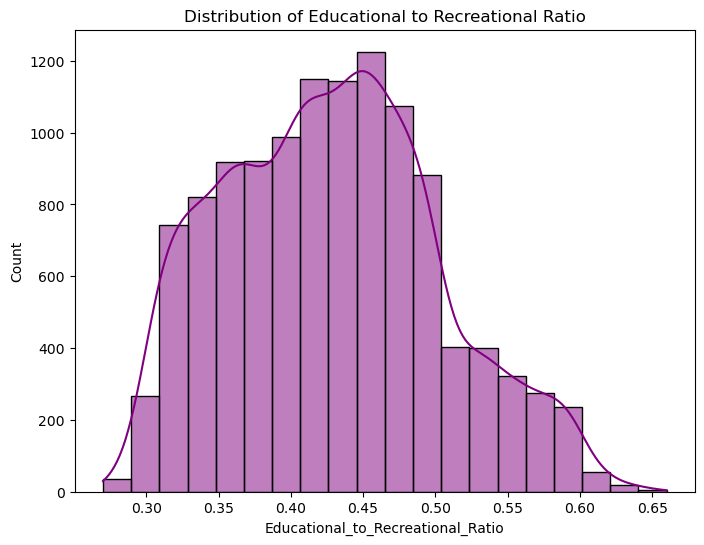

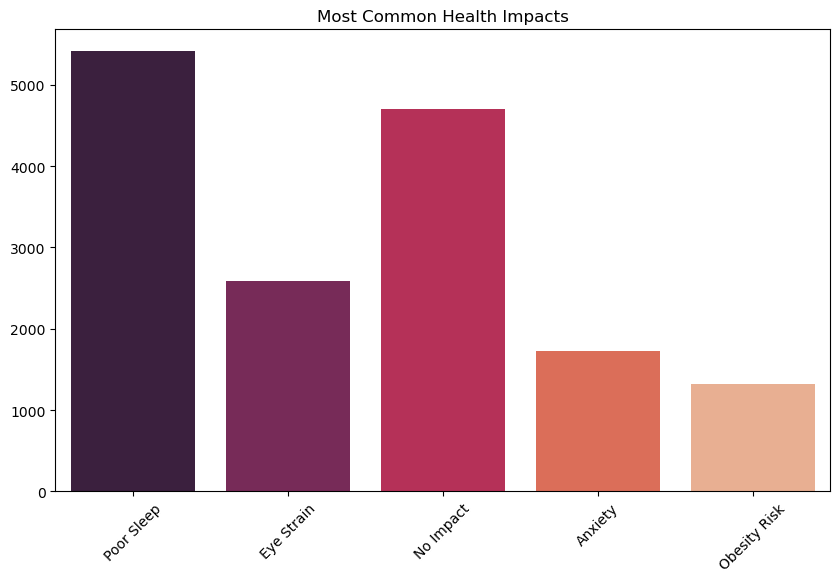

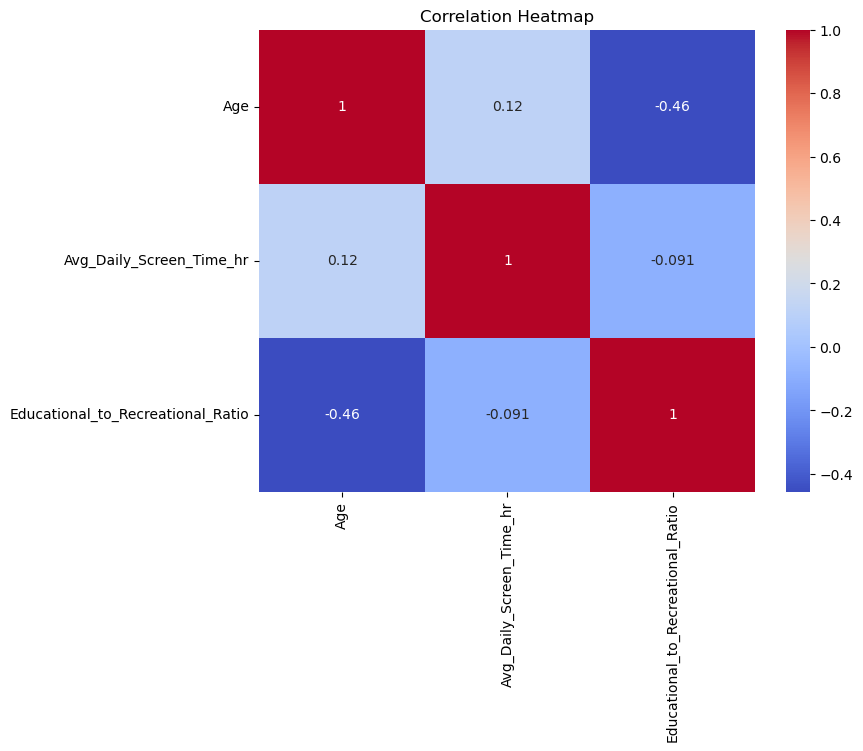

In [94]:
# 📊 EDA for Indian Kids Screen Time Dataset

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter


# -------------------------------
# 1. Age vs Screen Time
plt.figure(figsize=(10,6))
sns.boxplot(data=a, x="Age", y="Avg_Daily_Screen_Time_hr", palette="viridis")
plt.title("Screen Time Distribution by Age")
plt.xticks(rotation=45)
plt.show()

# -------------------------------
# 2. Gender Differences
plt.figure(figsize=(8,6))
sns.barplot(data=a, x="Gender", y="Avg_Daily_Screen_Time_hr", ci=None, palette="Set2")
plt.title("Average Screen Time by Gender")
plt.show()

# -------------------------------
# 3. Primary Device Usage
plt.figure(figsize=(8,6))
sns.countplot(data=a, x="Primary_Device", order=a["Primary_Device"].value_counts().index, palette="coolwarm")
plt.title("Primary Device Distribution")
plt.xticks(rotation=45)
plt.show()

# -------------------------------
# 4. Urban vs Rural
plt.figure(figsize=(8,6))
sns.barplot(data=a, x="Urban_or_Rural", y="Avg_Daily_Screen_Time_hr", ci=None, palette="mako")
plt.title("Average Screen Time: Urban vs Rural")
plt.show()

# -------------------------------
# 5. Exceeding Recommended Limit
plt.figure(figsize=(6,6))
a["Exceeded_Recommended_Limit"].value_counts().plot.pie(autopct="%1.1f%%", colors=["#ff9999","#66b3ff"])
plt.title("Exceeded Recommended Screen Time Limit")
plt.ylabel("")
plt.show()

# -------------------------------
# 6. Educational vs Recreational Ratio
plt.figure(figsize=(8,6))
sns.histplot(a["Educational_to_Recreational_Ratio"], bins=20, kde=True, color="purple")
plt.title("Distribution of Educational to Recreational Ratio")
plt.show()

# -------------------------------
# 7. Health Impacts
health_list = a["Health_Impacts"].dropna().str.split(", ").sum()
health_counts = Counter(health_list)

plt.figure(figsize=(10,6))
sns.barplot(x=list(health_counts.keys()), y=list(health_counts.values()), palette="rocket")
plt.title("Most Common Health Impacts")
plt.xticks(rotation=45)
plt.show()

# -------------------------------
# 8. Correlation Analysis
plt.figure(figsize=(8,6))
sns.heatmap(a[["Age","Avg_Daily_Screen_Time_hr","Educational_to_Recreational_Ratio"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
